## Linear Optimization Problem

In [1]:
from ortools.linear_solver import pywraplp
import numpy as np
import plotly.express as px
from snippets.plotters import line_func
from pathlib import Path
import pandas as pd

## Simple Problem
Maximize $3x+y$ subject to:

$$
0 <= x <= 1 \\
0 <= y <= 2 \\
0 <= x+y <= 2 \\
$$

In [18]:
solver = pywraplp.Solver.CreateSolver("GLOP")

In [19]:
# Create the decision variables and set their individual constraints
x = solver.NumVar(0, 1, "x")
y = solver.NumVar(0, 2, "y")
print(f"Number of variables = {solver.NumVariables()}")

Number of variables = 2


In [20]:
type(x)

ortools.linear_solver.pywraplp.Variable

In [21]:
# Set the 0 <= x + y <= 2 constraint
ct = solver.Constraint(0, 2, "ct")
ct.SetCoefficient(x, 1)
ct.SetCoefficient(y, 1)
print(f"Number of constraints = {solver.NumConstraints()}")

Number of constraints = 1


In [22]:
# Set the maximization objective for 3x+y
obj = solver.Objective()
obj.SetCoefficient(x, 3)
obj.SetCoefficient(y, 1)
obj.SetMaximization()

In [23]:
solver.Solve()
print("Solution:")
print(f"Objective value = {obj.Value()}")
print(f"x = {x.solution_value()}")
print(f"y = {y.solution_value()}")

Solution:
Objective value = 4.0
x = 1.0
y = 1.0


Maximize $3x+4y$ subject to:

$$
x+2y <= 14 \\
3x-y >= 0 \\
x-y <= 2 \\
$$

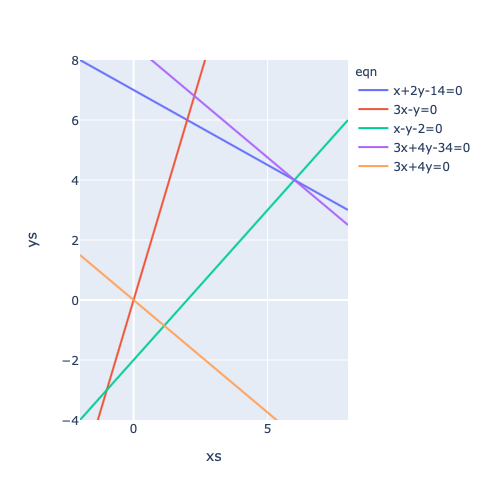

In [24]:
xs = np.array([-2, 8])
f1 = line_func(a=1, b=2, c=-14)
f2 = line_func(a=3, b=-1, c=0)
f3 = line_func(a=1, b=-1, c=-2)
f4 = line_func(a=3, b=4, c=-34)  # This is the solution line
f5 = line_func(a=3, b=4, c=0)
ys = np.concatenate((f1(xs), f2(xs), f3(xs), f4(xs), f5(xs)), axis=0)
xx = np.concatenate((xs, xs, xs, xs, xs), axis=0)
eqn = (["x+2y-14=0"] * len(xs)) + (["3x-y=0"] * len(xs)) + (["x-y-2=0"] * len(xs)) + (["3x+4y-34=0"] * len(xs)) + (["3x+4y=0"] * len(xs))

px.line(
    width=575, height=500,
    range_x=[-2, 8],
    range_y=[-4, 8],
    data_frame={
        "xs": xx,
        "ys": ys,
        "eqn": eqn
    },
    x="xs",
    y="ys",
    color="eqn"
)

In [25]:
solver = pywraplp.Solver.CreateSolver("GLOP")

In [26]:
# Isn't this setting the constraints that x > 0 and y > 0?
x = solver.NumVar(0, solver.infinity(), "x")
y = solver.NumVar(0, solver.infinity(), "y")

In [27]:
solver.Add(x + 2*y <= 14.0)
solver.Add(3*x - y >= 0.0)
solver.Add(x - y <= 2.0)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7fa0a8f732a0> >

In [28]:
solver.Maximize(3*x + 4*y)

In [29]:
status = solver.Solve()

In [30]:
status == pywraplp.Solver.OPTIMAL

True

In [31]:
print(f"Objective value = {solver.Objective().Value():.3f}")
print(f"x = {x.solution_value():.3f}")
print(f"y = {y.solution_value():.3f}")

Objective value = 34.000
x = 6.000
y = 4.000


### Stigler Diet Problem - UNSOLVED

In [32]:
food_df = pd.read_csv(Path.home()/"mldata"/"stigler-diet"/"foods.tsv", sep="\t")
intake_df = pd.read_csv(Path.home()/"mldata"/"stigler-diet"/"intake.tsv", sep="\t")

In [33]:
food_df.head()

Commodity    Unit  1939 price (cents)  Calories(1000s)  \
0   Wheat Flour (Enriched)  10 lb.                36.0             44.7   
1                 Macaroni   1 lb.                14.1             11.6   
2  Wheat Cereal (Enriched)  28 oz.                24.2             11.8   
3              Corn Flakes   8 oz.                 7.1             11.4   
4                Corn Meal   1 lb.                 4.6             36.0   

   Protein(grams)  Calcium(grams)  Iron(mg)  Vitamin A(1000 IU)  \
0            1411             2.0       365                 0.0   
1             418             0.7        54                 0.0   
2             377            14.4       175                 0.0   
3             252             0.1        56                 0.0   
4             897             1.7        99                30.9   

   Thiamine (Vitamin B1)(mg)  Riboflavin (Vitamin B2)(mg)  Niacin(mg)  \
0                       55.4                         33.3         441   
1                        3.2                          1.9          68   
2                       14.4                          8.8         114   
3                       13.5                          2.3          68   
4                       17.4                          7.9         106   

   Ascorbic Acid (Vitamin C)(mg)  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [34]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Commodity                      77 non-null     object 
 1   Unit                           77 non-null     object 
 2   1939 price (cents)             77 non-null     float64
 3   Calories(1000s)                77 non-null     float64
 4   Protein(grams)                 77 non-null     int64  
 5   Calcium(grams)                 77 non-null     float64
 6   Iron(mg)                       77 non-null     int64  
 7   Vitamin A(1000 IU)             77 non-null     float64
 8   Thiamine (Vitamin B1)(mg)      77 non-null     float64
 9   Riboflavin (Vitamin B2)(mg)    77 non-null     float64
 10  Niacin(mg)                     77 non-null     int64  
 11  Ascorbic Acid (Vitamin C)(mg)  77 non-null     int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 7.3

In [35]:
intake_df

Nutrient  Daily Recommended Intake
0                Calories(1000s)                       3.0
1                 Protein(grams)                      70.0
2                 Calcium(grams)                       0.8
3                       Iron(mg)                      12.0
4             Vitamin A(1000 IU)                    5000.0
5      Thiamine (Vitamin B1)(mg)                       1.8
6    Riboflavin (Vitamin B2)(mg)                       2.7
7                     Niacin(mg)                      18.0
8  Ascorbic Acid (Vitamin C)(mg)                      75.0

The optimization problem is how to spend as less as one can and still meet the intake requirements?

In the foods file, the nutrients are per dollar, i.e., in the first row it says that if one spends \$1 on wheat, one can get 44.7 calories, 1411 grams of protien, 2 grams of calcium, etc.

Lets say one spends $\$x_1$ on wheat, $\$x_2$ on macaroni, etc. The optimization problem is to - 

Minimize $x_1 + x_2 + ... + x_{77}$ subject to:

$$
44.7x_1 + 11.6x_2 + 11.8x_3 + ... + 20.5x_{77} >= 3000 \\
1411x_1 + 418x_2 + 377x_3 + ... + 11x_{77} >= 70 \\
:::
$$

And a further constraint that $x_i$ are all positive, i.e.,
$$
x_i >= 0
$$

In [36]:
# solver = pywraplp.Solver.CreateSolver("GLOP")
solver = pywraplp.Solver("SolveStigler", pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

The number of decision variables is the number of food commodities in the foods table. The objective function has each of these decision variable's coefficient set to 1.

In [37]:
food_vars = []
objective = solver.Objective()
for _, row in food_df.iterrows():
    food_var = solver.NumVar(0.0, solver.infinity(), row.Commodity)
    objective.SetCoefficient(food_var, 1)
    food_vars.append(food_var)
objective.SetMinimization()

In [38]:
food_vars[0]

Wheat Flour (Enriched)

In [39]:
type(food_vars[0])

ortools.linear_solver.pywraplp.Variable

The number of constraints is the same as the number of nutrients. The constraint limits are the minimum amount of intake requireed upto a maximum of inifnity.

In [40]:
constraints = []
for _, r1 in intake_df.iterrows():
    # constraint will be `some function >= daily recommended intake`
    constraint = solver.Constraint(r1["Daily Recommended Intake"], solver.infinity())
    # for each food item set the constraint for this nutrient
    nutrient = r1["Nutrient"]
    for (_, r2), food_var in zip(food_df.iterrows(), food_vars):
        constraint.SetCoefficient(food_var, r2[nutrient])
    constraints.append(constraint)

In [41]:
status = solver.Solve()

In [42]:
status == solver.OPTIMAL

True

In [43]:
solver.Objective().Value()

5.491538837426703

In [45]:
for food_var in food_vars:
    if food_var.solution_value() > 0:
        print(food_var, food_var.solution_value())

Cheese (Cheddar) 0.048780487804878064
Spinach 5.442758349621825
